In [31]:
# Weather for Salt Lake
import matplotlib.pyplot as plt
import requests 
from scipy import stats
import pandas as pd
from config import APIKEY
from datetime import datetime
from meteostat import Point, Daily


In [19]:
#using the weather map for data

url= "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={APIKEY}&units={units}&q="

In [27]:
#Selected City Salt Lake, Portland and Miami for diversity

cities = ["Salt Lake City","Miami","Portland"]

lat = []
temp = []
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

    
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data


The latitude information received is: [40.7608, 25.7743, 45.5234]
The temperature information received is: [5, 27.54, 4.08]


,city,lat,temp
0,Salt Lake City,40.7608,5.00
1,Miami,25.7743,27.54
2,Portland,45.5234,4.08


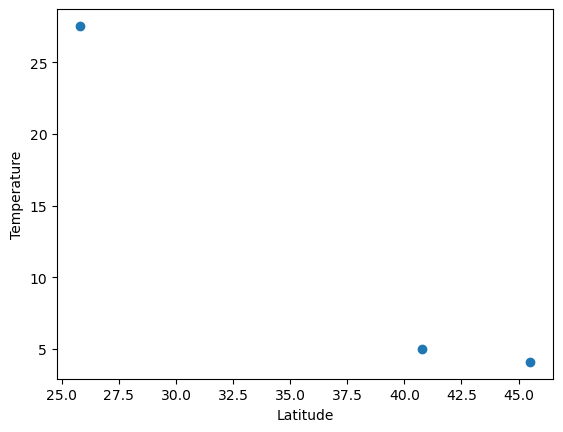

In [28]:
#Salt Lake comparison of Temperature vs 
#the Latitude against other cities with different climate
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

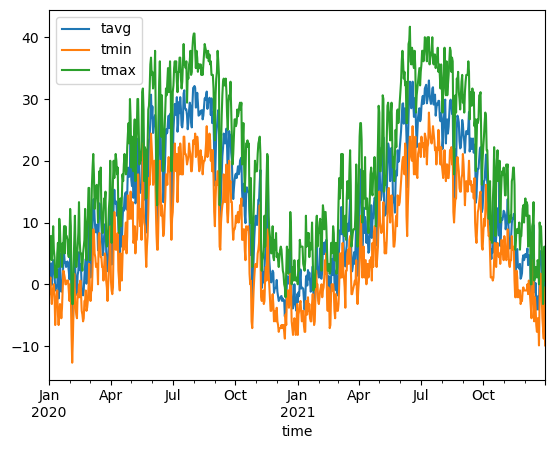

In [33]:
start = datetime(2020,1,1)
end = datetime(2021,12,31)
#Salt Lake City Location
location = Point(40.759926, -111.884888)
data = Daily(location,start,end)
data = data.fetch()

data.plot(y=['tavg','tmin','tmax'])
plt.show()


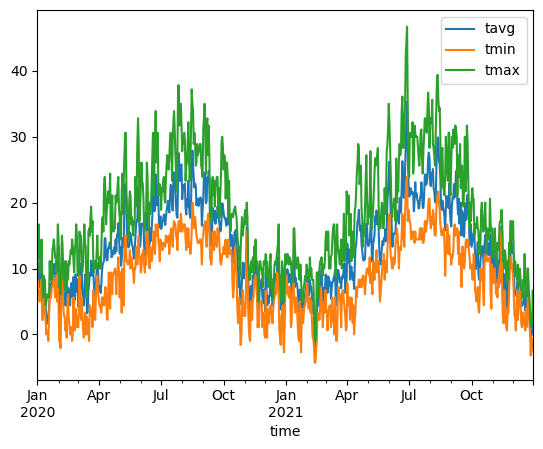

In [34]:
start = datetime(2020,1,1)
end = datetime(2021,12,31)
#Portland Location
location = Point(45.5152, -122.6784)
data = Daily(location,start,end)
data = data.fetch()

data.plot(y=['tavg','tmin','tmax'])
plt.show()

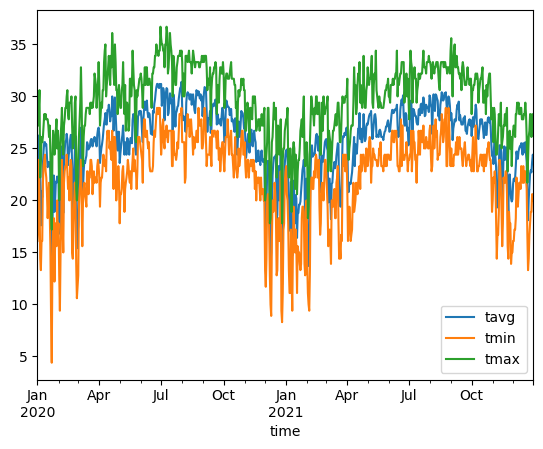

In [35]:
start = datetime(2020,1,1)
end = datetime(2021,12,31)
#Miami Location
location = Point(25.7617, -80.1918)
data = Daily(location,start,end)
data = data.fetch()

data.plot(y=['tavg','tmin','tmax'])
plt.show()